In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import pickle 

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Train",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal try\\images\\Validation",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical')

base_model = InceptionV3(weights='imagenet', input_shape=(299, 299, 3), include_top=False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Found 463 images belonging to 3 classes.
Found 110 images belonging to 3 classes.


In [5]:
Model_Checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'Inceptionmodelsavev2.keras',
    monitor='val_accuracy',
    save_best_only='True',
    verbose=1
)

Epoch 1/125
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4614 - loss: 77.6327
Epoch 1: val_accuracy improved from -inf to 0.65455, saving model to Inceptionmodelsavev2.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.4652 - loss: 77.0668 - val_accuracy: 0.6545 - val_loss: 8.8712
Epoch 2/125
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6608 - loss: 15.6077
Epoch 2: val_accuracy improved from 0.65455 to 0.70909, saving model to Inceptionmodelsavev2.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 52s 3s/step - accuracy: 0.6620 - loss: 15.3438 - val_accuracy: 0.7091 - val_loss: 4.2200
Epoch 3/125
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7153 - loss: 4.6926
Epoch 3: val_accuracy improved from 0.70909 to 0.74545, saving model to Inceptionmodelsavev2.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.7160 - loss: 4.6448 - val_accuracy: 0.7455 - val_loss: 2.2591
Epoch 4/125
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7082 - loss: 2.6533
Epoch 4: val_accuracy

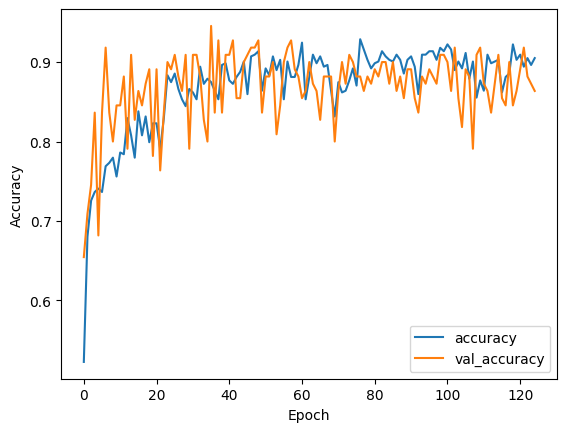

In [6]:
history = model.fit(
    train_generator,
    epochs=125,  
    validation_data=validation_generator,
    batch_size=32,
    callbacks=[Model_Checkpoint])  

with open('Inceptionv3training_history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

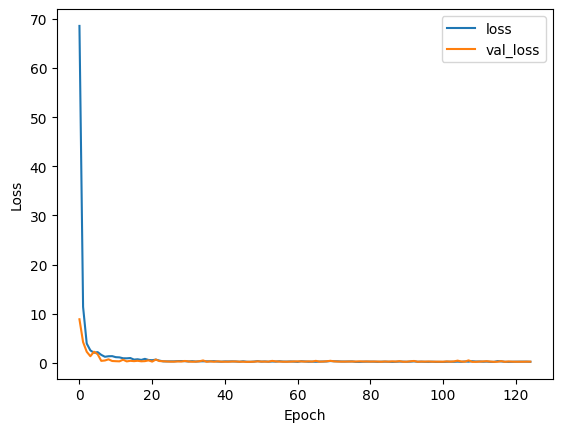

In [7]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
test_generator = test_datagen.flow_from_directory(
    "C:\\Users\\User\\Desktop\\Stage\\Optimal Try\\images\\Test",
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')
print(f'Test loss: {test_loss:.4f}')

Found 70 images belonging to 3 classes.
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 836ms/step - accuracy: 0.9376 - loss: 0.2486
Test accuracy: 91.43%
Test loss: 0.3199


In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_generator.reset()
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


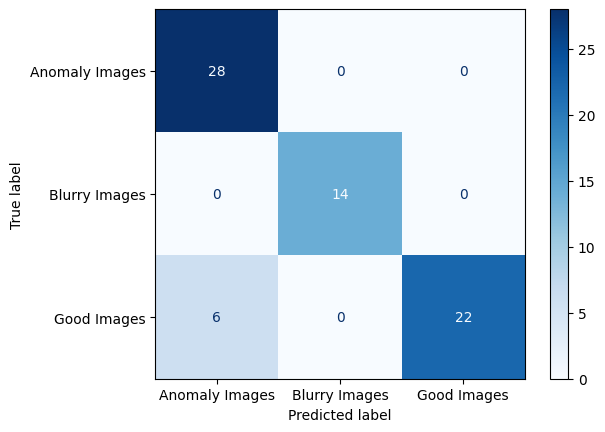

In [11]:
labels = list(test_generator.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()